<a href="https://colab.research.google.com/github/mnbeebe/MLB/blob/main/ResNet50_Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data

In [62]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

--2024-11-09 02:12:46--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.180.207, 142.251.16.207, 172.253.62.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.180.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   129MB/s    in 0.5s    

2024-11-09 02:12:47 (129 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Reading the Data into arrays

In [63]:
from PIL import Image
import numpy as np

x_train, y_train = [], []
NUMBER_OF_EXAMPLES = 100

cats_dir = os.path.join(train_dir + "/cats")
dogs_dir = os.path.join(train_dir + "/dogs")
i = 0
while i < NUMBER_OF_EXAMPLES:
  if i % 2 == 0:
    im = Image.open(os.path.join(cats_dir, os.listdir(cats_dir)[i])).convert("RGB")
    im_resized = im.resize((150, 150))
    x_train.append(np.array(im_resized))
    y_train.append(1)
  else:
    im = Image.open(os.path.join(dogs_dir, os.listdir(dogs_dir)[i])).convert("RGB")
    im_resized = im.resize((150, 150))
    x_train.append(np.array(im_resized))
    y_train.append(0)
  i += 1

x_train = np.array(x_train)
y_train = np.array(y_train)


## Beginning to define the model (this is where you come in, I loaded the pretrained model for you)

In [64]:
import tensorflow as tf

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(150, 150, 3),
    pooling='avg',
    classes=2,
    weights='imagenet'
)

for layer in pretrained_model.layers:
  layer.trainable = False


In [76]:
from tensorflow.keras import layers

model = tf.keras.models.Sequential()
model.add(pretrained_model)
model.add(layers.Dense(1, activation = 'sigmoid'));

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=5)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6677 - loss: 0.6597
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8174 - loss: 0.4337
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8676 - loss: 0.2872
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.9263 - loss: 0.1846
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9416 - loss: 0.1501


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


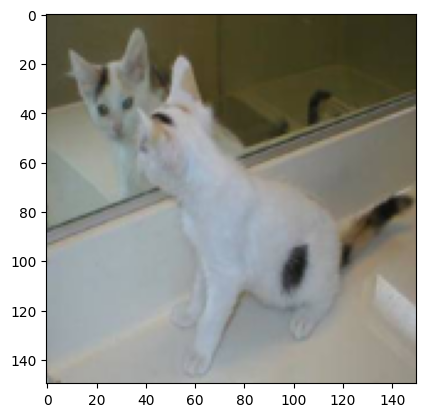

Prediction:  Cat


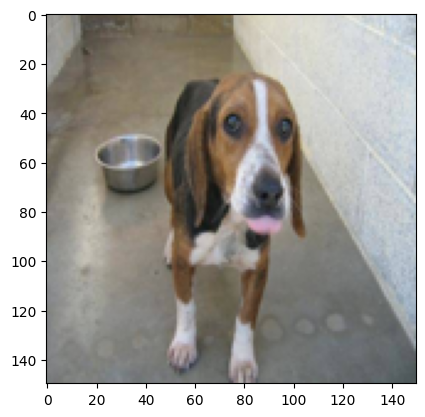

Prediction:  Dog


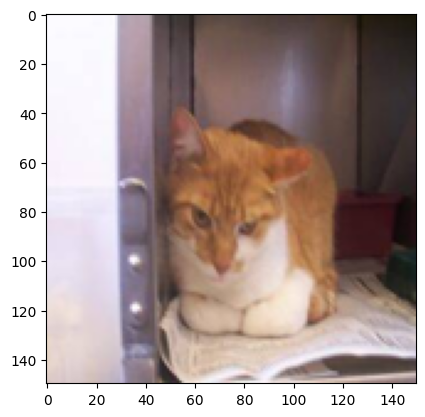

Prediction:  Cat


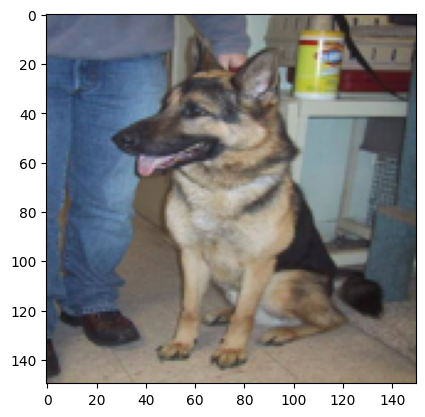

Prediction:  Dog


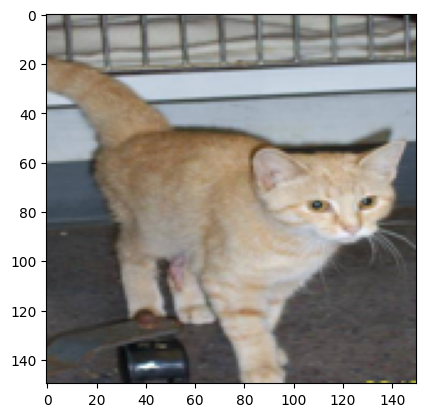

Prediction:  Cat


In [77]:
#Showing predictions
import matplotlib.pyplot as plt

number_of_images = 5

probabilities = model.predict(x_train[:number_of_images])
predictions = probabilities >= 0.5
for index in range(len(probabilities)):
  plt.imshow(x_train[index], cmap='gray')
  plt.show()
  print("Prediction: ", "Cat" if predictions[index] else "Dog")

In [78]:
#Testing predictions on new images
x_test, y_test = [], []
NUMBER_OF_EXAMPLES = 100

cats_dir = os.path.join(validation_dir + "/cats")
dogs_dir = os.path.join(validation_dir + "/dogs")
i = 0
while i < NUMBER_OF_EXAMPLES:
  if i % 2 == 0:
    im = Image.open(os.path.join(cats_dir, os.listdir(cats_dir)[i])).convert("RGB")
    im_resized = im.resize((150, 150))
    x_test.append(np.array(im_resized))
    y_test.append(1)
  else:
    im = Image.open(os.path.join(dogs_dir, os.listdir(dogs_dir)[i])).convert("RGB")
    im_resized = im.resize((150, 150))
    x_test.append(np.array(im_resized))
    y_test.append(0)
  i += 1

x_test = np.array(x_test)
y_test = np.array(y_test)

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)


4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8699 - loss: 0.2601
0.26413610577583313 0.8700000047683716
